<a href="https://colab.research.google.com/github/puraminy/mini_proj2/blob/master/Fusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load DATA


#### Data Main Source
#####https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

In [1]:
!git clone "https://github.com/puraminy/mini_proj2"

fatal: destination path 'mini_proj2' already exists and is not an empty directory.


In [2]:
import numpy as np
import pandas as pd

dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv"

#github = "https://raw.githubusercontent.com/puraminy/mini_proj2/master/polution.csv"

github = "mini_proj2/polution.csv"

c=pd.read_csv(github)
data=np.asarray(c)
print(data)
np.shape(data)

[[0.12977867 0.35294122 0.24590163 ... 0.00229001 0.         0.        ]
 [0.14889336 0.36764708 0.24590163 ... 0.00381099 0.         0.        ]
 [0.15995975 0.42647061 0.22950819 ... 0.00533197 0.         0.        ]
 ...
 [0.01006036 0.2647059  0.26229507 ... 0.40558836 0.         0.        ]
 [0.01006036 0.2647059  0.26229507 ... 0.41399646 0.         0.        ]
 [0.00804829 0.2647059  0.24590163 ... 0.42086649 0.         0.        ]]


(43799, 8)

In [0]:
from matplotlib import pyplot
values = c.values
# specify columns to plot
def plot_trends():
  groups = [0, 1, 2, 3, 5, 6, 7]
  i = 1
  # plot each column
  pyplot.figure()
  for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(c.columns[group], y=0.5, loc='right')
    i += 1
  pyplot.show()

# Preparing Time Series

In [0]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
def create_data(n_hours = 24, n_train = 10000):
  dataset = read_csv('mini_proj2/polution.csv', header=0)
  values = dataset.values
  
  print(np.shape(values))
  # integer encode direction
  encoder = LabelEncoder()
  values[:,4] = encoder.fit_transform(values[:,4])
  # ensure all data is float
  values = values.astype('float32')
  # normalize features
  # scaler = MinMaxScaler(feature_range=(0, 1))
  scaled = values # scaler.fit_transform(values)
  # specify the number of lag hours
  # n_hours = 24
  n_features = 8 
  # frame as supervised learning
  reframed = series_to_supervised(scaled, n_hours, 1)

 # print(reframed[:2])
 # print(reframed.shape)

  # split into train and test sets
  values = reframed.values
   #365 * 24
  train = values[:n_train, :]
  test = values[n_train:, :]
  # split into input and outputs
  n_obs = n_hours * n_features
  train_X, train_y = train[:, :n_obs], train[:, -n_features]

  test_X, test_y = test[:, :n_obs], test[:, -n_features]
  print(train_X.shape, len(train_X), train_y.shape)
  # reshape input to be 3D [samples, timesteps, features]
    
  train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
  test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
  print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
  
  return train_X,train_y, test_X, test_y



# Split Train & Test Data

In [0]:
# def create_data2(n_hours = 24, n_train = 10000, step =1):
#   n_train+=n_hours
#   c=pd.read_csv(github)
#   data=np.asarray(c)

#   print(data[1:10])
  
#   print(np.shape(data))
  
#   data.reindex(index=data.index[::-1])
  
#   print(data[1:10])
  
#   print(data.shape[0])
#   n_test = 1000 #data.shape[0]-n_train
#   train = data[:n_train, :]
#   test = data[n_train:n_train+n_test, :]


#   train_X = np.zeros([n_train-n_hours, n_hours, 8])
#   train_y = np.zeros([n_train-n_hours, 1])
#   for i in range (n_train-n_hours):
#       train_X[i,:,:] = train[i:i+n_hours,:]
#       train_y[i] = train[i+n_hours,0]

#   test_X = np.zeros([n_test-n_hours, n_hours, 8])
#   test_y = np.zeros([n_test-n_hours, 1])
#   for i in range (n_test-n_hours):
#       test_X[i,:,:] = test[i:i+n_hours,:]
#       test_y[i] = test[i+n_hours,0]

#   print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
  
#   return train_X,train_y, test_X, test_y

def create_data3(n_records = 7, n_train = 10000, n_test = -1, stride =24):
  n_train+=n_records*stride
  if n_test > 0:
    n_test+=n_records*stride
  
  c=pd.read_csv(github)
  c = c.iloc[::-1]
  data=np.asarray(c)
  
#   print(data[-10:])

  print(np.shape(data))
  
  print(data.shape[0])
  n_test = n_test if n_test > 0 else data.shape[0]-n_train
  train = data[:n_train, :]
  test = data[n_train:n_train+n_test, :]

  n_items = n_records*stride

  train_X = np.zeros([n_train-n_items, n_records, 8])
  train_y = np.zeros([n_train-n_items, 1])
  
  
  for i in range (n_train-n_items):
      train_X[i,:,:] = train[i:i+n_items:stride,:]
      train_y[i] = train[i,0]

  test_X = np.zeros([n_test-n_items, n_records, 8])
  test_y = np.zeros([n_test-n_items, 1])
  for i in range (n_test-n_items):
      test_X[i,:,:] = test[i:i+n_items:stride,:]
      test_y[i] = test[i,0]

  print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
  
  return train_X,train_y, test_X, test_y

# create_data3()

# Model

(43799, 8)
43799
(10000, 24, 8) (10000, 1) (20000, 24, 8) (20000, 1)
(43799, 8)
43799
(10000, 24, 8) (10000, 1) (20000, 24, 8) (20000, 1)
(43799, 8)
43799
(10000, 24, 8) (10000, 1) (20000, 24, 8) (20000, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 24, 8)             0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 24)                3168      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 25        
Total params: 3,193
Trainable params: 3,193
Non-trainable params: 0
_________________________________________________________________
############ model_fusion ########################
Train on 9000 samples, validate on 1000 samples
Epoch 1/24
9000/9000 [==============================] - 58s 6ms/step - loss: 0.0128 - mean_absolut

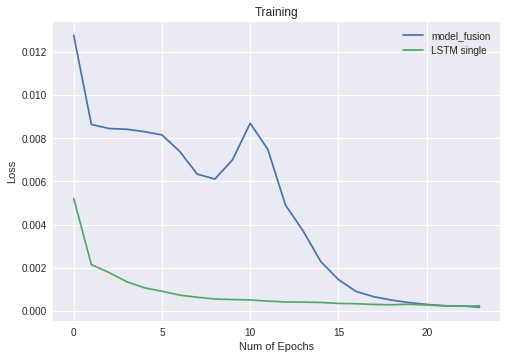

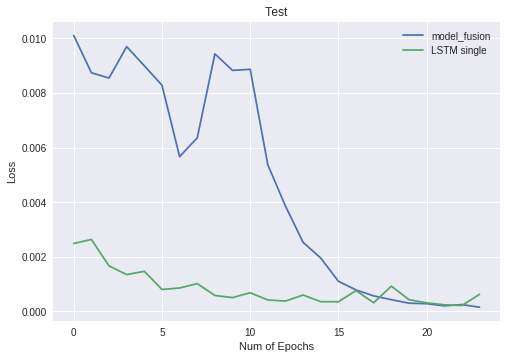

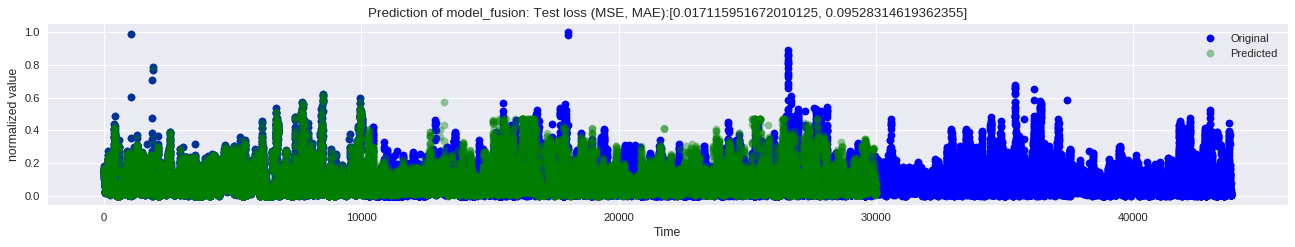

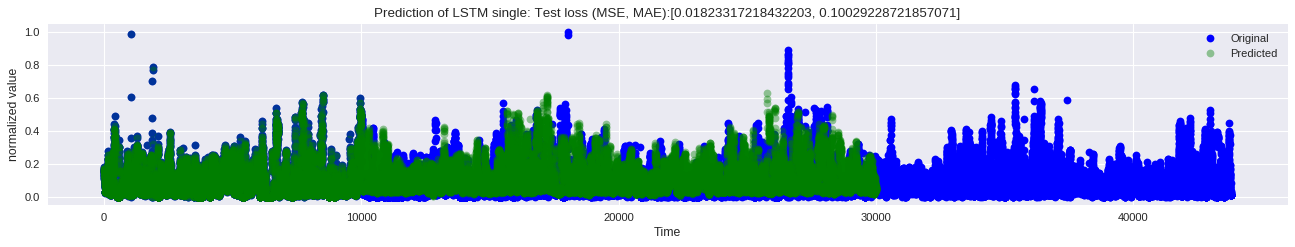

In [9]:
from keras.layers import Flatten
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Concatenate, Input, concatenate
from keras.layers import LSTM, GRU, SimpleRNN

import tensorflow as tf
def create_model(cell_type = "normal", optimizer = 'adam', loss_func='mse', dropout=0):
  if cell_type == "lstm":
    model = Sequential()   
    if dropout == 0:   
      model.add(LSTM(24, input_shape=(train_X_1.shape[1], train_X_1.shape[2])))
    else:
      model.add(LSTM(24, batch_input_shape=(100, train_X.shape[1], train_X.shape[2]), 
                     stateful=True, 
                     dropout=dropout))
    model.add(Dense(1, activation='linear'))
  elif cell_type == "gru":
    model = Sequential()
    model.add(GRU(30, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1, activation='linear'))
  elif cell_type == "rnn":
    model = Sequential()
    if dropout == 0:
      model.add(SimpleRNN(100, input_shape=(train_X.shape[1], train_X.shape[2])))
    else:
      model.add(SimpleRNN(100, batch_input_shape=(100, train_X.shape[1], train_X.shape[2]), 
                     stateful=True, 
                     dropout=dropout))
    model.add(Dense(1, activation='linear'))
  else:
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Dense(10)) 
    model.add(Dense(1, activation='linear'))
  
  model.name = 'model_' + cell_type + '_' + optimizer + '_' +loss_func + ('_dropout_' +str(dropout) if dropout else '')
  if optimizer == 'rmsprop':
    optimizer = tf.train.RMSPropOptimizer(0.001)
    
#   model.compile(loss='mae', optimizer=optimizer)
  
  model.compile(loss=loss_func,
              optimizer=optimizer,
              metrics=['mae'])

  return model

n_train = 10000
n_test = 20000
batch_size=100

# train_X,train_y, test_X, test_y = create_data2(n_hours, n_train=n_train)

train_X_1,train_y, test_X_1, test_y = create_data3(n_records=24, 
                                               n_train=n_train,
                                               n_test=n_test,
                                               stride=1)
train_X_2,train_y, test_X_2, test_y = create_data3(n_records=24, 
                                               n_train=n_train,
                                               n_test=n_test,
                                               stride=24)

train_X_3,train_y, test_X_3, test_y = create_data3(n_records=24, 
                                               n_train=n_train,
                                               n_test=n_test,
                                               stride=24*7)


# print(train_y_1)
# print("========================")
# print(train_y_2)
inp1 = Input(shape=(train_X_1.shape[1], train_X_1.shape[2]))
inp2 = Input(shape=(train_X_2.shape[1], train_X_2.shape[2]))
inp3 = Input(shape=(train_X_3.shape[1], train_X_3.shape[2]))
 


x = LSTM(24)(inp1)
x = Dense(1, activation='relu')(x)

y = LSTM(24)(inp2)
y = Dense(1, activation='relu')(y)

z = LSTM(24)(inp3)
z = Dense(1, activation='relu')(z)

w = concatenate([x, y, z])

# u =  Dense(3)(w)
out1 =  Dense(1, activation='linear')(w)

model1 = Model(inputs=[inp1, inp2, inp3], outputs=out1)

model1.compile(loss='mse',
        optimizer='adam',
        metrics=['mae'])

model1.name = 'model_fusion'


x2 = LSTM(24)(inp1)

out2 = Dense(1, activation='linear')(x2)

model2 = Model(inputs=inp1, outputs=out2)

model2.compile(loss='mse',
        optimizer='adam',
        metrics=['mae'])

model2.name = 'LSTM single'

model2.summary()

# model2 = create_model("lstm", "adam", "mse")
# model2.summary()

legends =[model1.name, model2.name]


print(f"############ {model1.name} ########################")


history1 = model1.fit([train_X_1, train_X_2, train_X_3], train_y, 
                    epochs=24,
                    validation_split=0.1,
#                     batch_size=batch_size,
                    verbose=1, shuffle=True)

print(f"############ {model2.name} ########################")

history2 = model2.fit(train_X_1, train_y, 
                    epochs=24,
#                     batch_size=batch_size,
                    validation_split=0.1,
                    verbose=1, shuffle=True)



# plot history

plt.figure(0)
plt.plot(history1.history['loss'], label='train')
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training")
plt.legend(legends)

plt.figure(0)
plt.plot(history2.history['loss'], label='train')
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training")
plt.legend(legends)

plt.figure(1)
plt.plot(history1.history['val_loss'], label='test')
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Test")
plt.legend(legends)

plt.figure(1)
plt.plot(history2.history['val_loss'], label='test')
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Test")
plt.legend(legends)

test_loss1 = model1.evaluate([test_X_1, test_X_2, test_X_3], test_y)

print(model1.name, " test loss:",test_loss1)

test_loss2 = model2.evaluate(test_X_1, test_y)

print(model2.name, " test loss:",test_loss2)

test_predictions = model1.predict([test_X_1, test_X_2, test_X_3]).flatten()

plt.figure(num=2, figsize=(20, 3), dpi=80, facecolor='w', edgecolor='k')
plt.title(f"Prediction of {model1.name}: Test loss (MSE, MAE):{test_loss1}")
plt.xlabel('Time')
plt.ylabel('normalized value')
plt.legend(('Original', 'Predicted'), loc='upper right')
plt.plot(data[:,0], 'bo')
plt.plot(np.concatenate([data[:n_train,0],test_predictions]), 'go', alpha=0.4)
plt.legend(('Original', 'Predicted'), loc='upper right')


test_predictions = model2.predict(test_X_1).flatten()

plt.figure(num=3, figsize=(20, 3), dpi=80, facecolor='w', edgecolor='k')
plt.title(f"Prediction of {model2.name}: Test loss (MSE, MAE):{test_loss2}")
plt.xlabel('Time')
plt.ylabel('normalized value')
plt.legend(('Original', 'Predicted'), loc='upper right')
plt.plot(data[:,0], 'bo')
plt.plot(np.concatenate([data[:n_train,0],test_predictions]), 'go', alpha=0.4)
plt.legend(('Original', 'Predicted'), loc='upper right')

plt.show()

## Results 


|hours|Mean Absolute Error |  loss function 
|--|--|
|1  |  0.01328097059825935
|10 |   0.016554366017757748 
| 24 | 0.02725420025859075 
| 50|  0.023748632413918377
| 50 |    0.03477914220943476 | MSE
| 1 |  0.042994678616862125
| 1 |  0.016500973061146625
| 48| 0.02513334271283482 
|48| 0.01888059062355331
|72| 0.020766058881570845




In [0]:
|# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
# import tensorflow as tf


# y_train = train_y
# x_train = train_X

# y_test = test_y
# x_test = test_X

# EPOCHS = 10

# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(120, activation=tf.nn.relu),
#     tf.keras.layers.Dense(18, activation=tf.nn.relu),
#     tf.keras.layers.Dense(1, activation='linear')
# ])

# optimizer = tf.train.RMSPropOptimizer(0.001)

# model.compile(loss='mse',
#               optimizer=optimizer,
#               metrics=['mae'])


# # Store training stats
# import matplotlib.pyplot as plt


# def plot_history(history):
#     plt.figure()
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error ')
#     plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
#              label='Train Loss')
#     plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
#              label='Val loss')
#     plt.legend()
#     #plt.ylim([0, 0.2])


# #model.summary()
# history = model.fit(x_train, y_train, epochs=EPOCHS,
#                 validation_split=0.1, verbose=1)

# model.summary()

# plot_history(history)
# test_predictions = model.predict(x_test).flatten()
# test_acc, test_loss = model.evaluate(x_test, y_test)
# print(f"test accuracy: {test_acc}, test loss {test_loss}")

#Plot Predicted Values

In [0]:

# plt.figure(num=None, figsize=(20, 3), dpi=80, facecolor='w', edgecolor='k')
# plt.xlabel('Time')
# plt.ylabel('normalized value')
# plt.legend(('Original', 'Predicted'), loc='upper right')
# plt.plot(data[:,0], 'bo')
# plt.plot(np.concatenate([data[:n_train,0],test_predictions]), 'go')
# plt.legend(('Original', 'Predicted'), loc='upper right')
